In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
explore_results = pd.read_csv("/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/explore-results.csv")

In [12]:
explore_results = explore_results[['real-label','predictive-set']]

In [14]:
explore_results[]

,real-label,predictive-set
0,roe_deer,"['roe_deer', 'wild_boar']"
1,agouti,['agouti']
2,white_tailed_deer,"['paca', 'white_tailed_deer']"
3,spiny_rat,"['spiny_rat', 'paca']"
4,wild_boar,"['wild_boar', 'roe_deer']"
5,red_fox,['red_fox']
6,collared_peccary,"['white-nosed_coati', 'collared_peccary']"
7,wild_boar,['wild_boar']


In [17]:
explore_results['predictive-set'][0]

"['roe_deer', 'wild_boar']"

In [8]:
plt.show("/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/explore_images.png")

Image 0 has label 'roe_deer', and the predictive set is ['roe_deer', 'wild_boar'].
Image 1 has label 'agouti', and the predictive set is ['agouti'].
Image 2 has label 'white_tailed_deer', and the predictive set is ['paca', 'white_tailed_deer'].
Image 3 has label 'spiny_rat', and the predictive set is ['spiny_rat', 'paca'].
Image 4 has label 'wild_boar', and the predictive set is ['wild_boar', 'roe_deer'].
Image 5 has label 'red_fox', and the predictive set is ['red_fox'].
Image 6 has label 'collared_peccary', and the predictive set is ['white-nosed_coati', 'collared_peccary'].
Image 7 has label 'wild_boar', and the predictive set is ['wild_boar'].


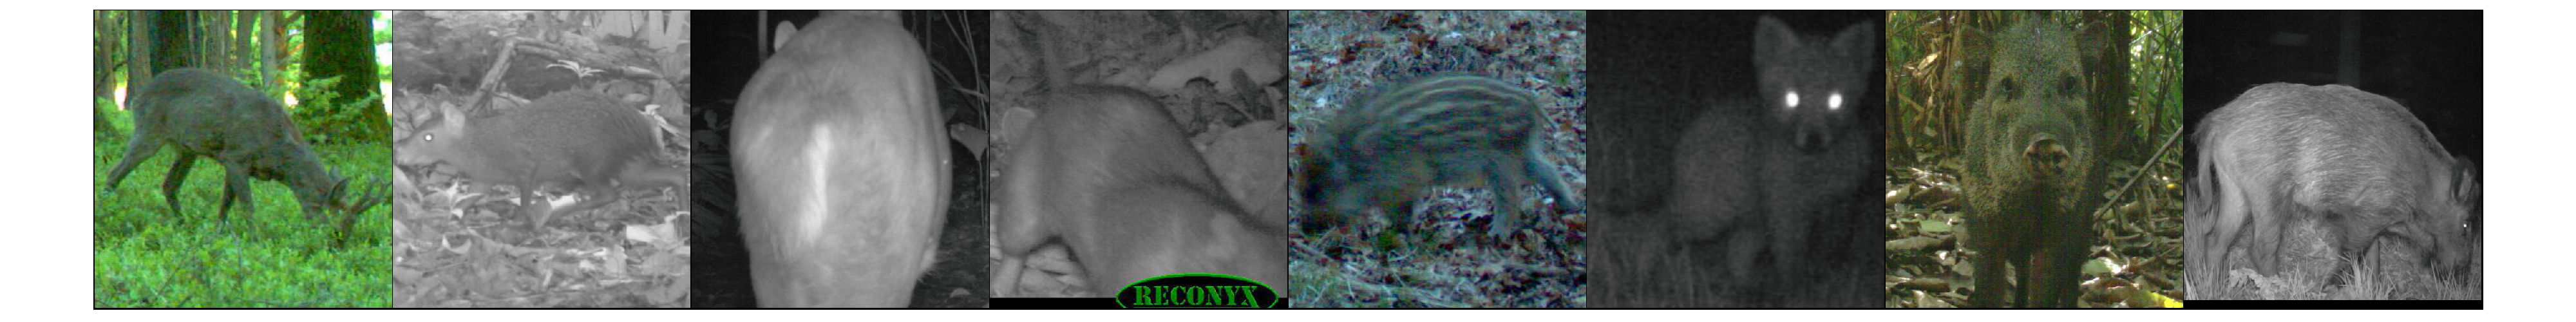

In [18]:
ORIG_IMAGE = Image.open("/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/explore_images.png")
for i in explore_results.index:
    print(f"Image {i} has label \'{explore_results['real-label'][i]}\', and the predictive set is {explore_results['predictive-set'][i]}.")
ORIG_IMAGE

# Evaluation

In [3]:
path = '/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/exp_3.csv'
evaluation = pd.read_csv(path)
evaluation

,Unnamed: 0,Model,Predictor,Top1,Top5,alpha,kreg,lamda,Coverage,Size
0,0,model,Fixed,0.848,0.983,0.05,NaN,NaN,0.948,2.684
1,0,model,Naive,0.864,0.978,0.05,NaN,NaN,0.931,1.922
2,0,model,APS,0.869,0.983,0.05,NaN,NaN,0.948,2.162
3,0,model,RAPS,0.841,0.979,0.05,NaN,NaN,0.933,2.162
4,0,model,Fixed,0.869,0.981,0.10,NaN,NaN,0.914,1.697
5,0,model,Naive,0.843,0.981,0.10,NaN,NaN,0.900,1.633
6,0,model,APS,0.848,0.978,0.10,NaN,NaN,0.919,1.769
7,0,model,RAPS,0.840,0.978,0.10,NaN,NaN,0.917,1.414


In [5]:
path = '/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/violation-exp1.csv'
violation = pd.read_csv(path)
violation

,Unnamed: 0,Model,alpha,APS violation,RAPS violation
0,0,model,0.05,0.05,0.05
1,0,model,0.10,0.10,0.10


In [8]:
path = '/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/optim-parameters-exp1.csv'
eval_optimization = pd.read_csv(path)
eval_optimization.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
eval_optimization

,Model,Predictor,Top1,Top5,alpha,kreg,lamda,Coverage,Size
0,model,Fixed,0.846,0.981,0.05,NaN,NaN,0.947,2.703
1,model,Naive,0.855,0.979,0.05,NaN,NaN,0.937,2.001
2,model,APS,0.845,0.981,0.05,NaN,NaN,0.957,2.202
3,model,RAPS,0.852,0.978,0.05,NaN,NaN,0.948,2.042
4,model,Fixed,0.849,0.983,0.10,NaN,NaN,0.900,1.590
5,model,Naive,0.853,0.980,0.10,NaN,NaN,0.885,1.493
6,model,APS,0.849,0.982,0.10,NaN,NaN,0.903,1.653
7,model,RAPS,0.855,0.981,0.10,NaN,NaN,0.912,1.406


In [24]:
topk_size = pd.read_pickle(
        "/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/topk_size_exp1.pkl")

In [26]:
topk_size.columns

Index(['model', 'predictor', 'size', 'topk', 'lamda', 'kreg', 'dict'], dtype='object')

In [45]:
topk_size['dict'].iloc[0]

defaultdict(list,
            {'tensor([11, 11,  1,  6,  6, 11,  5,  4, 12,  2,  3,  6,  7, 11,  2, 12])-topk': [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
             'tensor([11, 11,  1,  6,  6, 11,  5,  4, 12,  2,  3,  6,  7, 11,  2, 12])-size': [array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1])],
             'tensor([10,  9, 12, 11,  9,  8,  3,  4, 13,  9, 13,  8,  5, 13, 11,  5])-topk': [array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])],
             'tensor([10,  9, 12, 11,  9,  8,  3,  4, 13,  9, 13,  8,  5, 13, 11,  5])-size': [array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1])],
             'tensor([11,  9,  1,  8,  4,  1,  1,  6,  6,  6, 13,  4, 13,  2,  3,  2])-topk': [array([1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1])],
             'tensor([11,  9,  1,  8,  4,  1,  1,  6,  6,  6, 13,  4, 13,  2,  3,  2])-size': [array([2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1])],
             'tensor([13,  3,  0,  6, 13, 11,  7,  6, 10,  9,  1

# Plots

In [10]:
import seaborn as sns

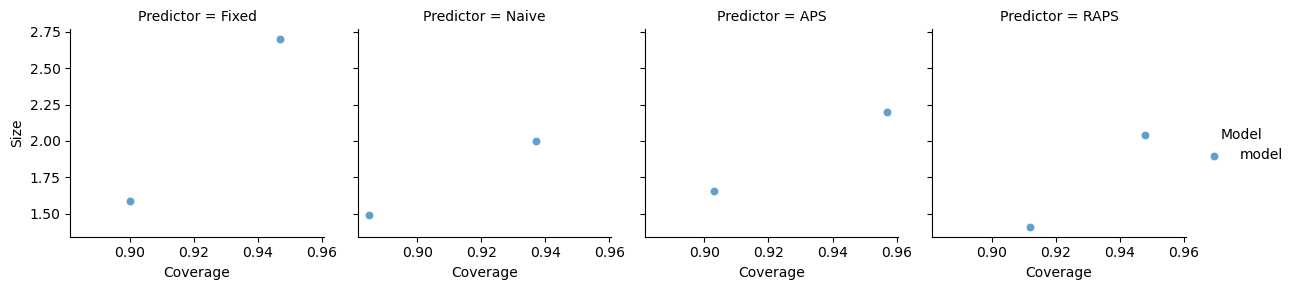

In [12]:
g = sns.FacetGrid(eval_optimization, col="Predictor", hue="Model")
g.map(sns.scatterplot, "Coverage","Size",alpha=0.7)
g.add_legend()


In [22]:
def plot_empirical_cov_sz(df,save_fig=False):
    # Make axes
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

    df['desired coverage (1-α)'] = 1-df['alpha']

    # Left barplot -- gray lines to indicate desired coverage level
    sns.barplot('desired coverage (1-α)', 'desired coverage (1-α)',
                data=df, alpha=0.3, ax=axs[0], edgecolor='k', ci=None, fill=False)
    # Left barplot -- empirical coverages
    bplot = sns.barplot(x='desired coverage (1-α)', y='Coverage', hue='Predictor',
                        data=df, ax=axs[0], alpha=0.5, ci='sd', linewidth=0.01)
    # Change alpha on face colors
    for patch in bplot.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.5))
    # Right barplot - empirical sizes
    sns.barplot(x='desired coverage (1-α)', y='Size', hue='Predictor',
                data=df, ax=axs[1], ci='sd', alpha=0.5, linewidth=0.01)
    sns.despine(top=True, right=True)

    axs[0].set_ylim(ymin=0.85, ymax=1.0)
    axs[0].set_yticks([0.85, 0.9, 0.95, 1])
    axs[0].set_ylabel('empirical coverage')

    axs[1].set_ylabel('average size')

    # Font size
    for ax in axs:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)
        ax.legend(fontsize=15, title_fontsize=15)
    axs[1].get_legend().remove()

    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    if save_fig:
        plt.savefig(
            '/Users/rebecaangulorojas/Desktop/TESIS/cp-for-image-classifier/output/conformal-alg/barplot-figure2.png')


In [23]:
plot_empirical_cov_sz(eval_optimization,save_fig=True)

/Users/rebecaangulorojas/opt/miniconda3/envs/tesis-conformal/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
